## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Loading Data and Selecting Features

### Import Data

In [4]:
loan_data_input_train = pd.read_csv('loan_data_input_train.csv', index_col= 0)
loan_data_target_train = pd.read_csv('loan_data_target_train.csv', index_col= 0)
loan_data_input_test = pd.read_csv('loan_data_input_test.csv', index_col= 0)
loan_data_target_test = pd.read_csv('loan_data_target_test.csv', index_col= 0)

### Explore Data

In [6]:
loan_data_input_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [7]:
loan_data_target_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [8]:
loan_data_input_train.shape

(373028, 324)

In [9]:
loan_data_target_train.shape

(373028, 1)

In [10]:
loan_data_input_test.shape

(93257, 324)

In [11]:
loan_data_target_test.shape

(93257, 1)

### Selecting Features

In [13]:
input_train_with_ref_cat = loan_data_input_train.loc[:, ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 
                                                         'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN', 'home_ownership:MORTGAGE', 
                                                         'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA', 'addr_state:NY', 
                                                         'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 
                                                         'addr_state:AR_MI_PA_OH_MN', 'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 
                                                         'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS', 
                                                         'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified', 
                                                         'verification_status:Source Verified', 'verification_status:Verified', 
                                                         'purpose:educ_sm_b_wedd_ren_en_mov_house', 'purpose:credit_card', 
                                                         'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:major_purch_car_home_impr',
                                                         'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length:0', 
                                                         'emp_length:1', 'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9', 'emp_length:10', 
                                                         'mths_since_issue_d:<37', 'mths_since_issue_d:37-39', 'mths_since_issue_d:40-41', 
                                                         'mths_since_issue_d:42-47', 'mths_since_issue_d:48-51', 'mths_since_issue_d:52-64', 
                                                         'mths_since_issue_d:65-83', 'mths_since_issue_d:>83', 'int_rate:<=9.548', 
                                                         'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 
                                                         'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'mths_since_earliest_cr_line:139-162', 
                                                         'mths_since_earliest_cr_line:162-242', 'mths_since_earliest_cr_line:242-265', 
                                                         'mths_since_earliest_cr_line:265-345', 'mths_since_earliest_cr_line:>345', 'delinq_2yrs:0', 
                                                         'delinq_2yrs:1-3', 'delinq_2yrs:>3', 'inq_last_6mths:0', 'inq_last_6mths:1-2', 
                                                         'inq_last_6mths:3-6', 'inq_last_6mths:>6', 'open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 
                                                         'open_acc:13-17', 'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30', 'open_acc:>30', 
                                                         'pub_rec:0-2', 'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51', 
                                                         'total_acc:>=52', 'acc_now_delinq:0', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<=5K', 
                                                         'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K', 'total_rev_hi_lim:20K-30K', 
                                                         'total_rev_hi_lim:30K-40K', 'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K', 
                                                         'total_rev_hi_lim:>95K', 'annual_inc:<20K', 'annual_inc:20K-30K', 'annual_inc:30K-40K', 
                                                         'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                                         'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100k-120K', 'annual_inc:120K-140K', 
                                                         'annual_inc:>140K', 'dti:<=1.4', 'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1', 
                                                         'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35', 
                                                         'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30', 
                                                         'mths_since_last_delinq:31-56', 'mths_since_last_delinq:.56', 'mths_since_last_record:Missing', 
                                                         'mths_since_last_record:0-2', 'mths_since_last_record:3-20', 'mths_since_last_record:21-31', 
                                                         'mths_since_last_record:32-80', 'mths_since_last_record:81-86', 'mths_since_last_record:>=86'
                                                        ]]

In [14]:
ref_categories = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Verified',
                  'purpose:educ_sm_b_wedd_ren_en_mov_house', 'initial_list_status:f', 'term:60', 'emp_length:0', 'mths_since_issue_d:>83', 
                  'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'delinq_2yrs:>3', 'inq_last_6mths:>6', 'open_acc:0', 'pub_rec:0-2', 
                  'total_acc:<=27', 'acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<20K', 'dti:>35', 'mths_since_last_delinq:0-3', 
                  'mths_since_last_record:0-2'
                  ]

In [15]:
input_train = input_train_with_ref_cat.drop(ref_categories, axis= 1)
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## PD Model Estimation

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
reg = LogisticRegression(max_iter= 5000)

In [20]:
pd.options.display.max_rows = None

In [21]:
reg.fit(input_train, loan_data_target_train)

C:\Users\f5497582\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [22]:
reg.intercept_

array([-1.92362046])

In [23]:
reg.coef_

array([[ 1.18816439e+00,  1.00839909e+00,  7.98989744e-01,
         5.82726223e-01,  3.58125231e-01,  1.54623377e-01,
         9.78432946e-02,  1.10863025e-01,  2.95719293e-02,
         5.45203083e-02,  6.69274761e-02,  5.98986214e-02,
         7.60353570e-02,  1.37243735e-01,  9.78590560e-02,
         1.84265778e-01,  2.43112773e-01,  2.26488214e-01,
         2.61328359e-01,  3.25091427e-01,  5.19442467e-01,
         7.71310415e-02,  1.06257257e-02,  3.50469795e-01,
         2.47055905e-01,  2.44627911e-01,  3.02402288e-01,
         1.14475289e-01,  8.76900279e-02,  8.99306844e-02,
         1.17248450e-01,  8.75430684e-02,  6.58100697e-02,
         1.32127801e-01,  4.67630671e-01,  2.04609300e-01,
         1.25087717e-01, -3.30340860e-02, -1.70589787e-01,
        -4.20147692e-01, -5.72187268e-01,  8.02123617e-01,
         4.07214332e-01,  1.84151083e-01,  3.98680082e-02,
         1.42144320e-02, -1.36132781e-02,  4.08851141e-03,
         4.98072397e-02,  5.64981616e-02,  4.44214023e-0

In [24]:
feature_name = input_train.columns.values

In [25]:
summary_table = pd.DataFrame(columns= ['Feature name'], data= feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.923620
1,grade:A,1.188164
2,grade:B,1.008399
3,grade:C,0.798990
4,grade:D,0.582726
5,grade:E,0.358125
6,grade:F,0.154623
7,home_ownership:OWN,0.097843
8,home_ownership:MORTGAGE,0.110863
9,addr_state:NM_VA,0.029572


### Building a Logistic Regression Model with P-Values

In [27]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [28]:
reg = LogisticRegression_with_p_values(max_iter= 5000)

In [29]:
reg.fit(input_train, loan_data_target_train)

C:\Users\f5497582\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
summary_table = pd.DataFrame(columns= ['Feature name'], data= feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.923620
1,grade:A,1.188164
2,grade:B,1.008399
3,grade:C,0.798990
4,grade:D,0.582726
5,grade:E,0.358125
6,grade:F,0.154623
7,home_ownership:OWN,0.097843
8,home_ownership:MORTGAGE,0.110863
9,addr_state:NM_VA,0.029572


In [31]:
p_values = reg.p_values

In [32]:
p_values = np.append(np.nan, np.array(p_values))

In [33]:
summary_table['p_values'] = p_values

In [34]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.923620,NaN
1,grade:A,1.188164,2.618815e-38
2,grade:B,1.008399,7.440971e-61
3,grade:C,0.798990,6.047261e-45
4,grade:D,0.582726,2.999851e-27
5,grade:E,0.358125,1.011472e-13
6,grade:F,0.154623,2.037942e-03
7,home_ownership:OWN,0.097843,1.215636e-06
8,home_ownership:MORTGAGE,0.110863,2.299538e-18
9,addr_state:NM_VA,0.029572,3.559940e-01


In [35]:
input_train_with_ref_cat = loan_data_input_train.loc[:, ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 
                                                         'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN', 'home_ownership:MORTGAGE', 
                                                         'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA', 'addr_state:NY', 
                                                         'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 
                                                         'addr_state:AR_MI_PA_OH_MN', 'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 
                                                         'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS', 
                                                         'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified', 
                                                         'verification_status:Source Verified', 'verification_status:Verified', 
                                                         'purpose:educ_sm_b_wedd_ren_en_mov_house', 'purpose:credit_card', 
                                                         'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:major_purch_car_home_impr',
                                                         'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length:0', 
                                                         'emp_length:1', 'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9', 'emp_length:10', 
                                                         'mths_since_issue_d:<37', 'mths_since_issue_d:37-39', 'mths_since_issue_d:40-41', 
                                                         'mths_since_issue_d:42-47', 'mths_since_issue_d:48-51', 'mths_since_issue_d:52-64', 
                                                         'mths_since_issue_d:65-83', 'mths_since_issue_d:>83', 'int_rate:<=9.548', 
                                                         'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 
                                                         'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'mths_since_earliest_cr_line:139-162', 
                                                         'mths_since_earliest_cr_line:162-242', 'mths_since_earliest_cr_line:242-265', 
                                                         'mths_since_earliest_cr_line:265-345', 'mths_since_earliest_cr_line:>345', 'inq_last_6mths:0', 
                                                         'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6', 'acc_now_delinq:0', 
                                                         'acc_now_delinq:>=1', 'annual_inc:<20K', 'annual_inc:20K-30K', 'annual_inc:30K-40K', 
                                                         'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                                         'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100k-120K', 'annual_inc:120K-140K', 
                                                         'annual_inc:>140K', 'dti:<=1.4', 'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1', 
                                                         'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35', 
                                                         'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30', 
                                                         'mths_since_last_delinq:31-56', 'mths_since_last_delinq:.56', 'mths_since_last_record:Missing', 
                                                         'mths_since_last_record:0-2', 'mths_since_last_record:3-20', 'mths_since_last_record:21-31', 
                                                         'mths_since_last_record:32-80', 'mths_since_last_record:81-86', 'mths_since_last_record:>=86'
                                                        ]]

In [36]:
ref_categories = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Verified',
                  'purpose:educ_sm_b_wedd_ren_en_mov_house', 'initial_list_status:f', 'term:60', 'emp_length:0', 'mths_since_issue_d:>83', 
                  'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'inq_last_6mths:>6', 'acc_now_delinq:0', 'annual_inc:<20K', 
                  'dti:>35', 'mths_since_last_delinq:0-3', 'mths_since_last_record:0-2'
                  ]

In [37]:
input_train = input_train_with_ref_cat.drop(ref_categories, axis= 1)
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [38]:
reg2 = LogisticRegression_with_p_values(max_iter= 5000)
reg2.fit(input_train, loan_data_target_train)

C:\Users\f5497582\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
feature_name = input_train.columns.values

In [40]:
summary_table = pd.DataFrame(columns= ['Feature name'], data= feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.359686
1,grade:A,1.187108
2,grade:B,1.011942
3,grade:C,0.799528
4,grade:D,0.581458
5,grade:E,0.358105
6,grade:F,0.154154
7,home_ownership:OWN,0.104818
8,home_ownership:MORTGAGE,0.113970
9,addr_state:NM_VA,0.030047


In [41]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.359686,NaN
1,grade:A,1.187108,2.863120e-38
2,grade:B,1.011942,1.113300e-61
3,grade:C,0.799528,1.824150e-45
4,grade:D,0.581458,1.400776e-27
5,grade:E,0.358105,3.374913e-14
6,grade:F,0.154154,1.656273e-03
7,home_ownership:OWN,0.104818,1.897196e-07
8,home_ownership:MORTGAGE,0.113970,1.762908e-19
9,addr_state:NM_VA,0.030047,3.476544e-01


## PD Model Validation (Test)

### Out-of-Sample Validation (test)

In [44]:
input_test_with_ref_cat = loan_data_input_test.loc[:, ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 
                                                         'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN', 'home_ownership:MORTGAGE', 
                                                         'addr_state:ND_NE_IA_NV_FL_HI_AL', 'addr_state:NM_VA', 'addr_state:NY', 
                                                         'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 
                                                         'addr_state:AR_MI_PA_OH_MN', 'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 
                                                         'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS', 
                                                         'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified', 
                                                         'verification_status:Source Verified', 'verification_status:Verified', 
                                                         'purpose:educ_sm_b_wedd_ren_en_mov_house', 'purpose:credit_card', 
                                                         'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:major_purch_car_home_impr',
                                                         'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length:0', 
                                                         'emp_length:1', 'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9', 'emp_length:10', 
                                                         'mths_since_issue_d:<37', 'mths_since_issue_d:37-39', 'mths_since_issue_d:40-41', 
                                                         'mths_since_issue_d:42-47', 'mths_since_issue_d:48-51', 'mths_since_issue_d:52-64', 
                                                         'mths_since_issue_d:65-83', 'mths_since_issue_d:>83', 'int_rate:<=9.548', 
                                                         'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 
                                                         'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'mths_since_earliest_cr_line:139-162', 
                                                         'mths_since_earliest_cr_line:162-242', 'mths_since_earliest_cr_line:242-265', 
                                                         'mths_since_earliest_cr_line:265-345', 'mths_since_earliest_cr_line:>345', 'inq_last_6mths:0', 
                                                         'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6', 'acc_now_delinq:0', 
                                                         'acc_now_delinq:>=1', 'annual_inc:<20K', 'annual_inc:20K-30K', 'annual_inc:30K-40K', 
                                                         'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                                         'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100k-120K', 'annual_inc:120K-140K', 
                                                         'annual_inc:>140K', 'dti:<=1.4', 'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1', 
                                                         'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35', 
                                                         'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30', 
                                                         'mths_since_last_delinq:31-56', 'mths_since_last_delinq:.56', 'mths_since_last_record:Missing', 
                                                         'mths_since_last_record:0-2', 'mths_since_last_record:3-20', 'mths_since_last_record:21-31', 
                                                         'mths_since_last_record:32-80', 'mths_since_last_record:81-86', 'mths_since_last_record:>=86'
                                                      ]]

In [45]:
ref_categories = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Verified',
                  'purpose:educ_sm_b_wedd_ren_en_mov_house', 'initial_list_status:f', 'term:60', 'emp_length:0', 'mths_since_issue_d:>83', 
                  'int_rate:>20.281', 'mths_since_earliest_cr_line:<138', 'inq_last_6mths:>6', 'acc_now_delinq:0', 'annual_inc:<20K', 
                  'dti:>35', 'mths_since_last_delinq:0-3', 'mths_since_last_record:0-2'
                  ]

In [46]:
input_test = input_test_with_ref_cat.drop(ref_categories, axis= 1)
input_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [47]:
y_hat_test = reg2.model.predict(input_test)

In [48]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
y_hat_test_proba = reg2.model.predict_proba(input_test)
y_hat_test_proba

array([[0.08527451, 0.91472549],
       [0.18518646, 0.81481354],
       [0.11138868, 0.88861132],
       ...,
       [0.02749858, 0.97250142],
       [0.04183046, 0.95816954],
       [0.05067498, 0.94932502]])

In [50]:
y_hat_test_proba = y_hat_test_proba[:, 1]
y_hat_test_proba

array([0.91472549, 0.81481354, 0.88861132, ..., 0.97250142, 0.95816954,
       0.94932502])

In [51]:
loan_data_target_test_temp = loan_data_target_test

In [52]:
loan_data_target_test_temp.reset_index(drop= True, inplace= True)

In [53]:
df_actual_predicted_proba = pd.concat([loan_data_target_test_temp, pd.DataFrame(y_hat_test_proba)], axis= 1)

In [54]:
df_actual_predicted_proba.shape

(93257, 2)

In [55]:
df_actual_predicted_proba.columns = ['loan_data_target_test', 'y_hat_test_proba']

In [56]:
df_actual_predicted_proba.index = loan_data_input_test.index

In [57]:
df_actual_predicted_proba.head()

,loan_data_target_test,y_hat_test_proba
362514,1,0.914725
288564,1,0.814814
213591,1,0.888611
263083,1,0.944133
165001,1,0.968036


### Accuracy and Area Under the Curve

In [59]:
# Change the value of tr depending on the confusion matrix results
tr = 0.9
df_actual_predicted_proba['y_hat_test'] = np.where(df_actual_predicted_proba['y_hat_test_proba'] > tr, 1, 0)

In [60]:
pd.crosstab(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test'], 
           rownames= ['Actual'], colnames= ['Predicted'])

Predicted,0,1
Actual,,
0,7348,2842
1,36206,46861


In [61]:
pd.crosstab(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test'], 
           rownames= ['Actual'], colnames= ['Predicted']) / df_actual_predicted_proba.shape[0]

Predicted,0,1
Actual,,
0,0.078793,0.030475
1,0.388239,0.502493


In [62]:
(pd.crosstab(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test'], 
           rownames= ['Actual'], colnames= ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test'], 
           rownames= ['Actual'], colnames= ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[1, 1]

0.5812861232936938

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
roc_curve(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.56500175e-04, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99321943, 0.99052378, ..., 0.4489277 , 0.34466195,
        0.30705738]))

In [65]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_proba['loan_data_target_test'], 
                                 df_actual_predicted_proba['y_hat_test_proba'])

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

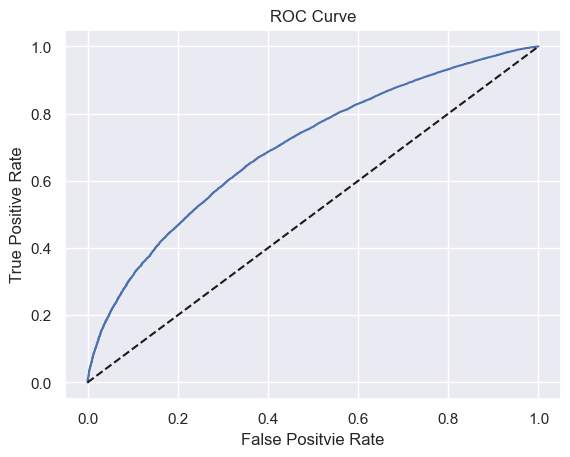

In [67]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle= '--', color= 'k')
plt.xlabel('False Positvie Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [68]:
AUROC = roc_auc_score(df_actual_predicted_proba['loan_data_target_test'], df_actual_predicted_proba['y_hat_test_proba'])
AUROC

0.698976815870155

### Gini and Kolmogorov-Smirnov

In [70]:
df_actual_predicted_proba = df_actual_predicted_proba.sort_values('y_hat_test_proba')

In [71]:
df_actual_predicted_proba.head()

,loan_data_target_test,y_hat_test_proba,y_hat_test
39810,0,0.307057,0
42341,1,0.344662,0
42344,1,0.348542,0
39892,0,0.448928,0
42404,1,0.461162,0


In [72]:
df_actual_predicted_proba.tail()

,loan_data_target_test,y_hat_test_proba,y_hat_test
258273,1,0.991363,1
239098,1,0.991547,1
261086,1,0.991553,1
239228,1,0.992140,1
242624,1,0.993219,1


In [73]:
df_actual_predicted_proba = df_actual_predicted_proba.reset_index()

In [74]:
df_actual_predicted_proba.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test
0,39810,0,0.307057,0
1,42341,1,0.344662,0
2,42344,1,0.348542,0
3,39892,0,0.448928,0
4,42404,1,0.461162,0


In [75]:
df_actual_predicted_proba['Cumm N Population'] = df_actual_predicted_proba.index + 1
df_actual_predicted_proba['Cumm N Good'] = df_actual_predicted_proba['loan_data_target_test'].cumsum()
df_actual_predicted_proba['Cumm N Bad'] = df_actual_predicted_proba['Cumm N Population'] - df_actual_predicted_proba['loan_data_target_test'].cumsum()

In [76]:
df_actual_predicted_proba.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,Cumm N Population,Cumm N Good,Cumm N Bad
0,39810,0,0.307057,0,1,0,1
1,42341,1,0.344662,0,2,1,1
2,42344,1,0.348542,0,3,2,1
3,39892,0,0.448928,0,4,2,2
4,42404,1,0.461162,0,5,3,2


In [77]:
df_actual_predicted_proba['Cumm Perc Population'] = df_actual_predicted_proba['Cumm N Population'] / (df_actual_predicted_proba.shape[0])
df_actual_predicted_proba['Cumm Perc Good'] = df_actual_predicted_proba['Cumm N Good'] / df_actual_predicted_proba['loan_data_target_test'].sum()
df_actual_predicted_proba['Cumm Perc Bad'] = df_actual_predicted_proba['Cumm N Bad'] / (df_actual_predicted_proba.shape[0] - df_actual_predicted_proba['loan_data_target_test'].sum())

In [78]:
df_actual_predicted_proba.head()

,index,loan_data_target_test,y_hat_test_proba,y_hat_test,Cumm N Population,Cumm N Good,Cumm N Bad,Cumm Perc Population,Cumm Perc Good,Cumm Perc Bad
0,39810,0,0.307057,0,1,0,1,0.000011,0.000000,0.000098
1,42341,1,0.344662,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.348542,0,3,2,1,0.000032,0.000024,0.000098
3,39892,0,0.448928,0,4,2,2,0.000043,0.000024,0.000196
4,42404,1,0.461162,0,5,3,2,0.000054,0.000036,0.000196


Text(0.5, 1.0, 'Gini')

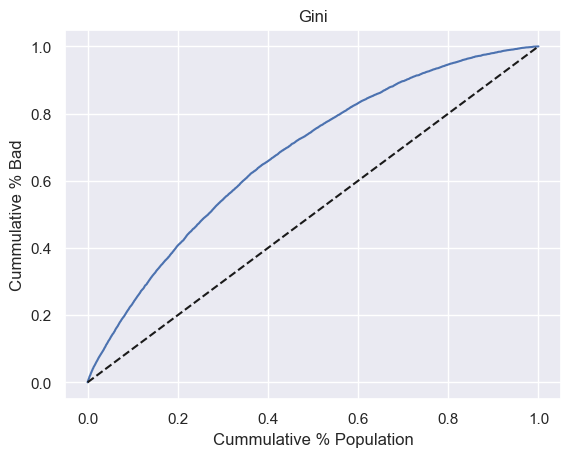

In [79]:
plt.plot(df_actual_predicted_proba['Cumm Perc Population'], df_actual_predicted_proba['Cumm Perc Bad'])
plt.plot(df_actual_predicted_proba['Cumm Perc Population'], df_actual_predicted_proba['Cumm Perc Population'], linestyle= '--', color= 'k')
plt.xlabel('Cummulative % Population')
plt.ylabel('Cummulative % Bad')
plt.title('Gini')

In [80]:
Gini = AUROC * 2 - 1
Gini

0.39795363174031007

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

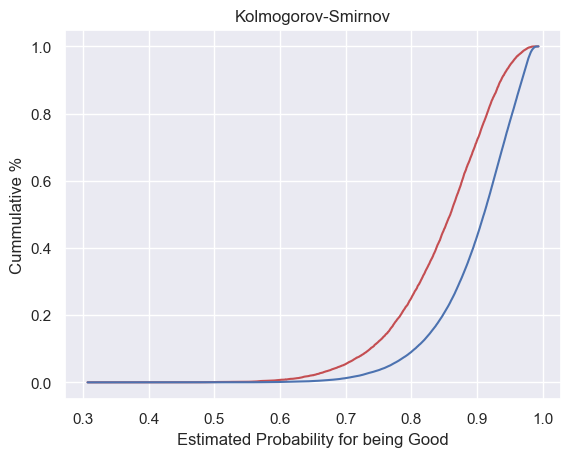

In [81]:
plt.plot(df_actual_predicted_proba['y_hat_test_proba'], df_actual_predicted_proba['Cumm Perc Bad'], color= 'r')
plt.plot(df_actual_predicted_proba['y_hat_test_proba'], df_actual_predicted_proba['Cumm Perc Good'], color= 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cummulative %')
plt.title('Kolmogorov-Smirnov')

In [82]:
KS = max(df_actual_predicted_proba['Cumm Perc Bad'] - df_actual_predicted_proba['Cumm Perc Good'])
KS

0.2925888820749624

## Applying the PD Model

### Calculating PD of Individual Accounts

In [158]:
pd.options.display.max_columns = None

In [160]:
input_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:major_purch_car_home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<37,mths_since_issue_d:37-39,mths_since_issue_d:40-41,mths_since_issue_d:42-47,mths_since_issue_d:48-51,mths_since_issue_d:52-64,mths_since_issue_d:65-83,mths_since_issue_d:>83,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<138,mths_since_earliest_cr_line:139-162,mths_since_earliest_cr_line:162-242,mths_since_earliest_cr_line:242-265,mths_since_earliest_cr_line:265-345,mths_since_earliest_cr_line:>345,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100k-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [162]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.359686,NaN
1,grade:A,1.187108,2.863120e-38
2,grade:B,1.011942,1.113300e-61
3,grade:C,0.799528,1.824150e-45
4,grade:D,0.581458,1.400776e-27
5,grade:E,0.358105,3.374913e-14
6,grade:F,0.154154,1.656273e-03
7,home_ownership:OWN,0.104818,1.897196e-07
8,home_ownership:MORTGAGE,0.113970,1.762908e-19
9,addr_state:NM_VA,0.030047,3.476544e-01


In [164]:
y_hat_test_proba

array([0.91472549, 0.81481354, 0.88861132, ..., 0.97250142, 0.95816954,
       0.94932502])

### Creating a Scorecard

In [169]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ_sm_b_wedd_ren_en_mov_house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>83,0,NaN
9,int_rate:>20.281,0,NaN


In [171]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.359686,NaN
1,1,grade:A,1.187108,2.863120e-38
2,2,grade:B,1.011942,1.113300e-61
3,3,grade:C,0.799528,1.824150e-45
4,4,grade:D,0.581458,1.400776e-27
5,5,grade:E,0.358105,3.374913e-14
6,6,grade:F,0.154154,1.656273e-03
7,7,home_ownership:OWN,0.104818,1.897196e-07
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19
9,9,addr_state:NM_VA,0.030047,3.476544e-01


In [175]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.359686,NaN,Intercept
1,1,grade:A,1.187108,2.863120e-38,grade
2,2,grade:B,1.011942,1.113300e-61,grade
3,3,grade:C,0.799528,1.824150e-45,grade
4,4,grade:D,0.581458,1.400776e-27,grade
5,5,grade:E,0.358105,3.374913e-14,grade
6,6,grade:F,0.154154,1.656273e-03,grade
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state


In [177]:
min_score = 300
max_score = 850

In [179]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.359686
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.060028
dti                           -0.065744
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line   -0.009021
mths_since_issue_d            -0.593082
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [181]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.0875607698048246

In [183]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.359686
acc_now_delinq                 0.274295
addr_state                     0.518401
annual_inc                     0.597698
dti                            0.231203
emp_length                     0.136328
grade                          1.187108
home_ownership                 0.113970
initial_list_status            0.118719
inq_last_6mths                 1.036388
int_rate                       0.824792
mths_since_earliest_cr_line    0.073853
mths_since_issue_d             0.482508
mths_since_last_delinq         0.243008
mths_since_last_record         0.755910
purpose                        0.355757
term                           0.078067
verification_status            0.066344
Name: Coefficients, dtype: float64

In [189]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.7346632215846505

In [195]:
df_scorecard['Score Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation
0,0,Intercept,-1.359686,NaN,Intercept,-95.602869
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660


In [197]:
df_scorecard['Score Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\f5497582\AppData\Local\Temp\ipykernel_17988\1767194473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation
0,0,Intercept,-1.359686,NaN,Intercept,351.178714
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660


In [199]:
df_scorecard['Score Preliminary'] = df_scorecard['Score Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary
0,0,Intercept,-1.359686,NaN,Intercept,351.178714,351.0
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494,83.0
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140,71.0
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798,56.0
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780,41.0
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223,25.0
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964,11.0
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012,7.0
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541,8.0
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660,2.0


In [201]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Preliminary'].min().sum()
min_sum_score_prel

299.0

In [203]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Preliminary'].max().sum()
max_sum_score_prel

848.0

In [205]:
df_scorecard['Difference'] = df_scorecard['Score Preliminary'] - df_scorecard['Score Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary,Difference
0,0,Intercept,-1.359686,NaN,Intercept,351.178714,351.0,-0.178714
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494,83.0,-0.468494
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140,71.0,-0.152140
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798,56.0,-0.216798
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780,41.0,0.116220
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223,25.0,-0.179223
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964,11.0,0.161036
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012,7.0,-0.370012
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541,8.0,-0.013541
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660,2.0,-0.112660


In [243]:
df_scorecard['Score Final'] = df_scorecard['Score Preliminary']
df_scorecard['Score Final'][66] = 3
df_scorecard['Score Final'][8] = 9
df_scorecard['Score Final'][24] = 26
df_scorecard['Score Final'][41] = -41
df_scorecard

C:\Users\f5497582\AppData\Local\Temp\ipykernel_17988\1255777617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score Final'][66] = 3
C:\Users\f5497582\AppData\Local\Temp\ipykernel_17988\1255777617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score Final'][8] = 9
C:\Users\f5497582\AppData\Local\Temp\ipykernel_17988\1255777617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score 

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary,Difference,Score Final
0,0,Intercept,-1.359686,NaN,Intercept,351.178714,351.0,-0.178714,351.0
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494,83.0,-0.468494,83.0
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140,71.0,-0.152140,71.0
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798,56.0,-0.216798,56.0
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780,41.0,0.116220,41.0
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223,25.0,-0.179223,25.0
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964,11.0,0.161036,11.0
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012,7.0,-0.370012,7.0
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541,8.0,-0.013541,9.0
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660,2.0,-0.112660,2.0


In [245]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Final'].min().sum()
min_sum_score_prel

300.0

In [247]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Final'].max().sum()
max_sum_score_prel

850.0

### Calculating Credit Score

In [252]:
input_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:major_purch_car_home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<37,mths_since_issue_d:37-39,mths_since_issue_d:40-41,mths_since_issue_d:42-47,mths_since_issue_d:48-51,mths_since_issue_d:52-64,mths_since_issue_d:65-83,mths_since_issue_d:>83,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<138,mths_since_earliest_cr_line:139-162,mths_since_earliest_cr_line:162-242,mths_since_earliest_cr_line:242-265,mths_since_earliest_cr_line:265-345,mths_since_earliest_cr_line:>345,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100k-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [254]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary,Difference,Score Final
0,0,Intercept,-1.359686,NaN,Intercept,351.178714,351.0,-0.178714,351.0
1,1,grade:A,1.187108,2.863120e-38,grade,83.468494,83.0,-0.468494,83.0
2,2,grade:B,1.011942,1.113300e-61,grade,71.152140,71.0,-0.152140,71.0
3,3,grade:C,0.799528,1.824150e-45,grade,56.216798,56.0,-0.216798,56.0
4,4,grade:D,0.581458,1.400776e-27,grade,40.883780,41.0,0.116220,41.0
5,5,grade:E,0.358105,3.374913e-14,grade,25.179223,25.0,-0.179223,25.0
6,6,grade:F,0.154154,1.656273e-03,grade,10.838964,11.0,0.161036,11.0
7,7,home_ownership:OWN,0.104818,1.897196e-07,home_ownership,7.370012,7.0,-0.370012,7.0
8,8,home_ownership:MORTGAGE,0.113970,1.762908e-19,home_ownership,8.013541,8.0,-0.013541,9.0
9,9,addr_state:NM_VA,0.030047,3.476544e-01,addr_state,2.112660,2.0,-0.112660,2.0


In [256]:
input_test_with_ref_cat_w_intercept = input_test_with_ref_cat

In [258]:
input_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [260]:
input_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:major_purch_car_home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<37,mths_since_issue_d:37-39,mths_since_issue_d:40-41,mths_since_issue_d:42-47,mths_since_issue_d:48-51,mths_since_issue_d:52-64,mths_since_issue_d:65-83,mths_since_issue_d:>83,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<138,mths_since_earliest_cr_line:139-162,mths_since_earliest_cr_line:162-242,mths_since_earliest_cr_line:242-265,mths_since_earliest_cr_line:265-345,mths_since_earliest_cr_line:>345,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100k-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [262]:
input_test_with_ref_cat_w_intercept = input_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [264]:
input_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:major_purch_car_home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<37,mths_since_issue_d:37-39,mths_since_issue_d:40-41,mths_since_issue_d:42-47,mths_since_issue_d:48-51,mths_since_issue_d:52-64,mths_since_issue_d:65-83,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:139-162,mths_since_earliest_cr_line:162-242,mths_since_earliest_cr_line:242-265,mths_since_earliest_cr_line:265-345,mths_since_earliest_cr_line:>345,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100k-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:.56,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ_sm_b_wedd_ren_en_mov_house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>83,int_rate:>20.281,mths_since_earliest_cr_line:<138,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [266]:
scorecard_scores = df_scorecard['Score Final']

In [268]:
input_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [270]:
scorecard_scores.shape

(102,)

In [272]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [274]:
scorecard_scores.shape

(102, 1)

In [279]:
y_scores = input_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,614.0
288564,552.0
213591,592.0
263083,645.0
165001,686.0


### From Credit Score to PD

In [283]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [285]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.915151
288564,0.817043
213591,0.887487
263083,0.943700
165001,0.967774


In [287]:
y_hat_test_proba[0: 5]

array([0.91472549, 0.81481354, 0.88861132, 0.94413259, 0.96803623])

Text(0.5, 1.0, 'ROC Curve')

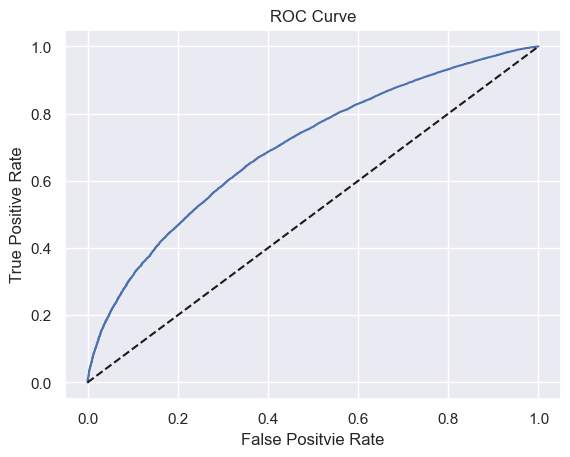

In [289]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle= '--', color= 'k')
plt.xlabel('False Positvie Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [291]:
thresholds.shape

(17427,)

In [293]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis= 1)

In [295]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.993219,0.000000,0.000012
2,0.990524,0.000000,0.000157
3,0.990450,0.000098,0.000157
4,0.989875,0.000098,0.000361


In [297]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [301]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [303]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1948.0
1,0.993219,0.000000,0.000012,797.0
2,0.990524,0.000000,0.000157,774.0
3,0.990450,0.000098,0.000157,773.0
4,0.989875,0.000098,0.000361,769.0


In [313]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.993219,0.000000,0.000012,797.0
2,0.990524,0.000000,0.000157,774.0
3,0.990450,0.000098,0.000157,773.0
4,0.989875,0.000098,0.000361,769.0


In [315]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17422,0.472527,0.999804,0.999964,439.0
17423,0.461162,0.999804,0.999976,436.0
17424,0.448928,0.999902,0.999976,432.0
17425,0.344662,0.999902,1.000000,402.0
17426,0.307057,1.000000,1.000000,390.0


In [317]:
def n_approved(p):
    return np.where(df_actual_predicted_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [325]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_proba['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [327]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.993219,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990524,0.000000,0.000157,774.0,13,93244,0.000139,0.999861
3,0.990450,0.000098,0.000157,773.0,14,93243,0.000150,0.999850
4,0.989875,0.000098,0.000361,769.0,31,93226,0.000332,0.999668


In [329]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17422,0.472527,0.999804,0.999964,439.0,93252,5,0.999946,0.000054
17423,0.461162,0.999804,0.999976,436.0,93253,4,0.999957,0.000043
17424,0.448928,0.999902,0.999976,432.0,93254,3,0.999968,0.000032
17425,0.344662,0.999902,1.000000,402.0,93256,1,0.999989,0.000011
17426,0.307057,1.000000,1.000000,390.0,93257,0,1.000000,0.000000


In [331]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903875,0.259666,0.540323,604.0,47529,45728,0.509656,0.490344
5001,0.903875,0.259764,0.540323,604.0,47530,45727,0.509667,0.490333
5002,0.903860,0.259764,0.540407,604.0,47537,45720,0.509742,0.490258
5003,0.903859,0.259863,0.540407,604.0,47538,45719,0.509753,0.490247
5004,0.903858,0.259863,0.540419,604.0,47539,45718,0.509763,0.490237
5005,0.903858,0.259961,0.540419,604.0,47540,45717,0.509774,0.490226
5006,0.903850,0.259961,0.540479,604.0,47545,45712,0.509828,0.490172
5007,0.903850,0.260059,0.540479,604.0,47546,45711,0.509838,0.490162
5008,0.903834,0.260059,0.540600,604.0,47556,45701,0.509946,0.490054
5009,0.903833,0.260157,0.540600,604.0,47557,45700,0.509956,0.490044


In [333]:
input_train_with_ref_cat.to_csv('input_train_with_ref_cat.csv')

In [335]:
df_scorecard.to_csv('df_scorecard.csv')